In [1]:
!pip install python-bidi
!pip install arabic-reshaper

وضعیت اولیه:
{'ظرف 1': [1, 2, 3], 'ظرف 2': [4, 5, 6]}

وضعیت نهایی:
{'ظرف 1': [2, 6], 'ظرف 2': [1, 3, 4, 5]}

آمار شبیه‌سازی:
میانگین: 2.62
انحراف معیار: 0.79
کمترین: 1.00
بیشترین: 4.00
حالت نهایی: 2.00


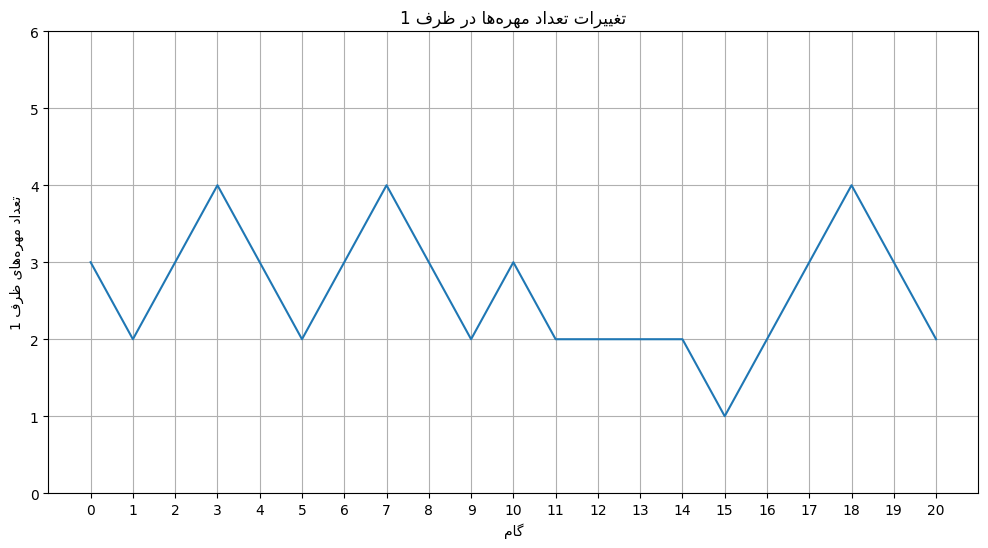

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

class NumberedBallsTransfer:
    def __init__(self, total_balls, initial_jar1_balls):
        """
        راه‌اندازی سیستم انتقال مهره‌های شماره‌دار

        پارامترها:
        total_balls: تعداد کل مهره‌ها (d)
        initial_jar1_balls: تعداد اولیه مهره‌ها در ظرف 1
        """
        self.total_balls = total_balls
        # نگهداری موقعیت هر مهره (True برای ظرف 1 و False برای ظرف 2)
        self.balls_location = {}

        # مقداردهی اولیه موقعیت مهره‌ها
        balls_in_jar1 = set(range(1, initial_jar1_balls + 1))
        for ball in range(1, total_balls + 1):
            self.balls_location[ball] = ball in balls_in_jar1

        self.history = [self.count_jar1()]

    def count_jar1(self):
        """شمارش تعداد مهره‌های موجود در ظرف 1"""
        return sum(1 for loc in self.balls_location.values() if loc)

    def step(self):
        """اجرای یک گام از فرآیند"""
        # انتخاب تصادفی یک مهره
        selected_ball = random.randint(1, self.total_balls)

        # با احتمال 1/2 جابجا می‌شود
        if random.random() < 0.5:
            self.balls_location[selected_ball] = not self.balls_location[selected_ball]

        # ذخیره وضعیت جدید
        self.history.append(self.count_jar1())

        return self.count_jar1()

    def simulate(self, steps):
        """شبیه‌سازی برای تعداد مشخصی گام"""
        for _ in range(steps):
            self.step()

    def get_ball_locations(self):
        """برگرداندن موقعیت فعلی همه مهره‌ها"""
        jar1 = [ball for ball, loc in self.balls_location.items() if loc]
        jar2 = [ball for ball, loc in self.balls_location.items() if not loc]
        return {'ظرف 1': sorted(jar1), 'ظرف 2': sorted(jar2)}

    def plot_history(self):
        """رسم نمودار تاریخچه تعداد مهره‌ها در ظرف 1"""
        plt.figure(figsize=(12, 6))
        plt.plot(self.history)
        plt.title(get_display(reshape('تغییرات تعداد مهره‌ها در ظرف 1')))
        plt.xlabel(get_display(reshape('گام')))
        plt.ylabel(get_display(reshape('تعداد مهره‌های ظرف 1')))
        plt.grid(True)
        # تنظیم مقیاس محورها به صورت صحیح
        plt.xticks(range(0, len(self.history), 1))
        plt.yticks(range(0, self.total_balls + 1, 1))
        return plt

    def get_statistics(self):
        """محاسبه آمار توصیفی"""
        stats = {
            'میانگین': np.mean(self.history),
            'انحراف معیار': np.std(self.history),
            'کمترین': min(self.history),
            'بیشترین': max(self.history),
            'حالت نهایی': self.history[-1]
        }

        return stats

def run_simulation_example():
    """اجرای یک مثال از شبیه‌سازی"""
    # مثال با 6 مهره، شروع با 3 مهره در ظرف 1
    sim = NumberedBallsTransfer(total_balls=6, initial_jar1_balls=3)

    print("وضعیت اولیه:")
    print(sim.get_ball_locations())

    # شبیه‌سازی 20 گام
    sim.simulate(20)

    print("\nوضعیت نهایی:")
    print(sim.get_ball_locations())

    print("\nآمار شبیه‌سازی:")
    stats = sim.get_statistics()
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")

    # نمایش نمودار
    plt = sim.plot_history()
    plt.show()

    return sim

# مثال استفاده
if __name__ == "__main__":
    sim = run_simulation_example()